In [ ]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.style  
style.use('fivethirtyeight')

NameError: ignored

Reading The train.csv of the titanic dataset. Test dataset has no 'survived' column coz it is fr us to be predicted

In [ ]:
tdf = pd.read_csv('C://Users//sanjay//Documents//ML//datasets ML//train.csv')
test = pd.read_csv('C://Users//sanjay//Documents//ML//datasets ML//test.csv')
#tdf
#print(msno.matrix(tdf))

PRE-PROCESING:{Both train and test datasets have null value so we will pre process both but use train data set i.e tdf fro building the model}

In [ ]:
print("Train dataset null values:\n",tdf.isna().sum())
print("\nTest dataset null values:\n",test.isna().sum())
#tdf['Sex'].unique()

Train dataset null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test dataset null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Embark viz


In [ ]:
#tdf['Embarked'] = label_encoder.fit_transform(tdf['Embarked'])
sea.countplot(tdf['Embarked'])
plt.show()

NameError: ignored

Pre-processing: Encoding 'Sex' column (coz its not numerical but object) data into numerical values using Label encoder packages from sklearn.
 Male - 1
 Female - 0
 and filling the missing values in age column

In [ ]:
#print(tdf['Sex'].unique())
tdf['Embarked'] = tdf['Embarked'].fillna('S')
label_encoder = LabelEncoder()
tdf['Sex'] = label_encoder.fit_transform(tdf['Sex'])
embarked = pd.get_dummies(tdf['Embarked'], prefix = 'Embarked_')
tdf = pd.concat([tdf, embarked], axis=1)
tdf.drop(['Embarked'],axis = 1,inplace=True)
#print(tdf['Sex'])
#tdf.groupby(['Sex','Pclass'])['Age'].median() this is for logic... i.e grouping sex & pclass with age
tdf['Age'] = tdf.groupby(['Sex','Pclass'])['Age'].transform(lambda x : x.fillna(x.median())) #missing value handling by comparing the sex with pclass to age and finding its median and filling that median value in the nan places
#tdf.isna().sum()

encoding sex of tdf and test and filling the missing values in age using groupby and transform function 

In [ ]:
test['Sex'] = label_encoder.fit_transform(test['Sex'])
test['Age'] = test.groupby(['Sex','Pclass'])['Age'].transform(lambda x : x.fillna(x.median()))
embarked = pd.get_dummies(test['Embarked'], prefix = 'Embarked_')
test = pd.concat([test, embarked], axis=1)
test.drop(['Embarked'],axis = 1,inplace=True)

Encoding embarked column .Before encoding we are handling the  missing values, since no.of missing values in Embarked column of tdf is very low(i.e 2)so, we r filling the missing values with 'S' which is the most occured element/data.
also we are filling the missing value in fare of test data set.
after encoding 'Q'=1, 'S='2', C='0'[coz alphabetic order]

In [ ]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
#tdf['Embarked'] = label_encoder.fit_transform(tdf['Embarked'])

Finding the cor relation b/w target and other variables to that we can drop negligible data 

PassengerId   -0.01
Survived       1.00
Pclass        -0.34
Sex           -0.54
Age           -0.06
SibSp         -0.04
Parch          0.08
Fare           0.26
Embarked__C    0.17
Embarked__Q    0.00
Embarked__S   -0.15
Name: Survived, dtype: float64


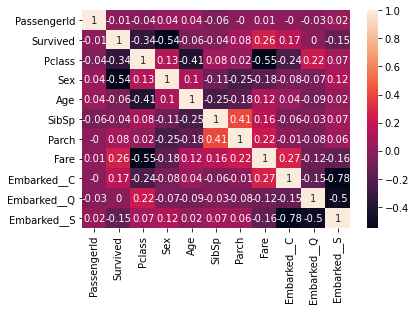

In [ ]:
cor = tdf.corr().round(2)
print(cor['Survived'])
sea.heatmap(cor, annot=True, robust = True)
plt.show()

DROPPING: 'PassengerId','SibSp','Parch','Name','Ticket','Cabin' coz their correlation to the target variable is very low  

In [ ]:
test.drop(['PassengerId','SibSp','Parch','Name','Ticket','Cabin'],axis = 1,inplace=True)
tdf.drop(['PassengerId','SibSp','Parch','Name','Ticket','Cabin'],axis = 1,inplace=True)
x = tdf.loc[:,['Pclass',	'Sex',	'Age',	'Fare',	'Embarked__C',	'Embarked__Q',	'Embarked__S']]
y = tdf.loc[:,['Survived']]


BUILDING THE MODEL.


In [ ]:
regressor = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 78)

#lm=StandardScaler()
#_train=pd.DataFrame(lm.fit_transform(x_train), columns=x_train.columns)
#y_test=pd.DataFrame(lm.transform(x_test), columns=x_test.columns)
#print(x_train.shape)
#print(y_train.shape)
#print(x_test.shape)
#print(y_test.shape)
#x_train.head()"""

In [ ]:
regressor.fit(x_train, y_train)

C:\Users\sanjay\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sanjay\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = regressor.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1], dtype=int64)

In [ ]:
y_test

,Survived
415,0
139,0
742,1
824,0
6,0
...,...
810,0
18,0
627,1
587,1


  Finding model accuracy!

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy = ",accuracy*100,"%")

Accuracy =  85.44776119402985 %


testing with another test data

In [ ]:
new_data = regressor.predict(test)
print(new_data)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 1 1 1 1 1 0 1 0 0 0]
